<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
df_bnk=pd.read_csv('bank_churn.csv')
df_bnk.head(5)

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


In [3]:
df_bnk.shape

(9920, 9)

In [4]:
df_bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [5]:
df_bnk.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

In [6]:
df_bnk.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [7]:
df_bnk['Closed_Acc'] = df_bnk['Closed_Acc'].astype('object')
df_bnk['HasCrCard'] = df_bnk['HasCrCard'].astype('object')
df_bnk['NumOfProducts'] = df_bnk['NumOfProducts'].astype('object')
df_bnk['NumOfYrsWithBank'] = df_bnk['NumOfYrsWithBank'].astype('object')

In [8]:
encode=pd.get_dummies(df_bnk,drop_first=True)
encode.head()

,CreditScore,Age,Balance,Geography_Germany,Geography_Spain,Gender_Male,NumOfYrsWithBank_1,NumOfYrsWithBank_2,NumOfYrsWithBank_3,NumOfYrsWithBank_4,NumOfYrsWithBank_5,NumOfYrsWithBank_6,NumOfYrsWithBank_7,NumOfYrsWithBank_8,NumOfYrsWithBank_9,NumOfYrsWithBank_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,Closed_Acc_1
0,619,42,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
1,608,41,83807.860000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,502,42,159660.800000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
3,699,39,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,850,43,125510.820000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
x=encode.drop('Closed_Acc_1',axis=1)
y=encode.Closed_Acc_1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.25 else 1 for i in prob]
np.exp(model.coef_)

array([[0.99473385, 1.04644947, 1.00000312, 1.00103346, 0.99964228,
        0.99890585, 1.00005644, 0.9999158 , 1.00002358, 0.99997396,
        1.00001264, 0.99999409, 0.99981163, 0.99989834, 1.00002775,
        1.00000318, 0.99763559, 1.00072425, 1.00021761, 0.99978534]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
x=encode.drop('Closed_Acc_1',axis=1)
y=encode.Closed_Acc_1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.25 else 1 for i in prob]

In [13]:
cmt=confusion_matrix(y_test,ypred)
TN=cmt[0,0]
TP=cmt[1,1]
FP=cmt[0,1]
FN=cmt[1,0]

specificity=TN/(TN+FP)
sensitivity=TP/(TP+FN)

print('Specificity :',specificity)
print('Sencitivity :',sensitivity)


Specificity : 0.7463445645263828
Sencitivity : 0.49878345498783455


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [16]:
# type your code here
rfe=RFE(log_reg,n_features_to_select=6)
mod=rfe.fit(x_train,y_train)

In [17]:
d = pd.Series(mod.ranking_,index=x_train.columns)
d[d==1].index

Index(['Geography_Germany', 'Gender_Male', 'NumOfYrsWithBank_7',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

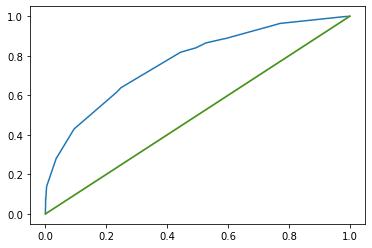

In [19]:
x = encode[['Geography_Germany', 'Gender_Male', 'NumOfYrsWithBank_7','NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4']]
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
log_reg = LogisticRegression()
model = log_reg.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
fpr,tpr,th = roc_curve(y_test,prob)
plt.plot(fpr,tpr)
plt.plot([[0,0],[1,1]])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
x = encode.drop('Closed_Acc_1',axis=1)
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
fpr,tpr,th = roc_curve(y_test,prob)
t = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':th})
t['YI'] = t.TPR-t.FPR
t.sort_values(by='YI',ascending=False).head(1)

,FPR,TPR,Threshold,YI
321,0.311507,0.586375,0.223029,0.274868


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
x = encode.drop('Closed_Acc_1',axis=1)
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.22 else 1 for i in prob]

In [25]:
print('Accuracy score',accuracy_score(y_test,ypred))
print('Kappa score',cohen_kappa_score(y_test,ypred))
print('Classification Report')
print(classification_report(y_test,ypred))

Accuracy score 0.6461693548387096
Kappa score 0.19128932161504297
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.66      0.75      1572
           1       0.31      0.59      0.41       412

    accuracy                           0.65      1984
   macro avg       0.59      0.63      0.58      1984
weighted avg       0.75      0.65      0.68      1984



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
df_num = df_bnk.select_dtypes(include=np.number)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
for i in range(len(df_num.columns)): 
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
    vif["Features"] = df_num.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_num = df_num.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)


   VIF_Factor Features
0    2.323866      Age
1    2.323866  Balance


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also,compute the ROC_AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
x = encode.drop('Closed_Acc_1',axis=1)
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.6 else 1 for i in prob]
print('The ROC_AUC_SCORE :',roc_auc_score(y_test,ypred))

The ROC_AUC_SCORE : 0.5016150349563971


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
x = encode.drop('Closed_Acc_1',axis=1)
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)

th=np.arange(0.1,1,0.1)
total_cost=[]

for i in th:
    pred = [0 if x <= i else 1 for x in prob[:,1]]
    cm = confusion_matrix(y_test,pred)
    fn = cm[1,0]
    fp = cm[0,1]
    cost = fn*2+fp*0.5
    total_cost.append(cost)
    
df = pd.DataFrame({'Threshold':th,'Total_cost':total_cost})
df.sort_values(by='Total_cost',ascending=True).head(1)
#min value when working with errors 

,Threshold,Total_cost
1,0.200000,601.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a full logistic model using the optimal cut-off probability obtained in Q8. Also, plot the confusion matrix and compute ROC_AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
x = encode.drop('Closed_Acc_1',axis=1)
y = encode.Closed_Acc_1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
prob = model.predict_proba(x_test)[:,1]
ypred = [0 if i < 0.2 else 1 for i in prob]
print(confusion_matrix(y_test,ypred))
print('ROC_AUC',round(roc_auc_score(y_test,ypred),2))

[[955 617]
 [145 267]]
ROC_AUC 0.63
